## 控制刻度间隔，要启用import matplotlib.ticker 对象

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### 01  通过控制轴对象，控制刻度

- ax = plt.axes()  # 获得轴对象
- ax.xaxis.set_major_locator() 获得轴上的最大位置
- ax.xaxis.set_minor_locator() 获得轴上的最小位置
- ticker.MultipleLocator() 控制刻度间隔的个数

因为y轴是无法控制的，所以只有x轴

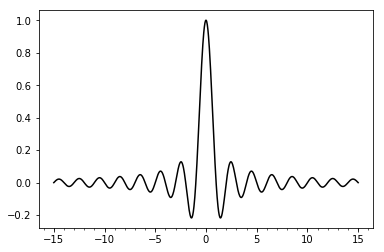

In [2]:

X = np.linspace(-15, 15, 1024)
Y = np.sinc(X)
ax = plt.axes()  # 获得轴对象
ax.xaxis.set_major_locator(ticker.MultipleLocator(5)) # x轴的刻度最大间隔为5
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1)) # x轴最小刻度间隔为1 ，分别控制两端和中间的距离
plt.plot(X, Y, c = 'k')
plt.show()

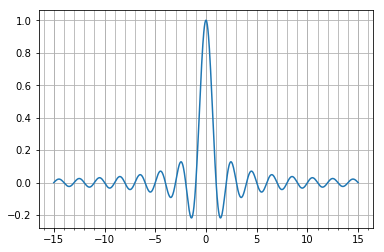

In [4]:
X = np.linspace(-15, 15, 1024)
Y = np.sinc(X)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.grid(True, which='both')  # 添加网格先
plt.plot(X, Y)
plt.show()

### 02 控制刻度的标签

- ax.xaxis.set_major_locator 控制轴上的位置
- ax.xaxis.set_major_formatter 控制轴上的标签
- ticker.FixedLocator()  控制刻度的位置
- ticker.FixedFormatter() 控制刻度的标签

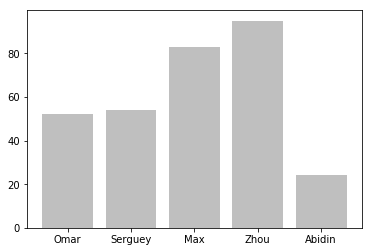

In [5]:
name_list = ('Omar', 'Serguey', 'Max', 'Zhou', 'Abidin')
value_list = np.random.randint(0, 99, size = len(name_list))
pos_list = np.arange(len(name_list))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
plt.bar(pos_list, value_list, color = '.75', align = 'center')
plt.show()

### 03 上述控制刻度的方法太麻烦，下面可以用简单的方法控制刻度
- xticks(), 在此之前要在plt.bar()中给一个align的参数，来指定刻度标签的位置

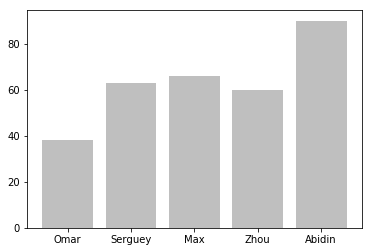

In [6]:
name_list = ('Omar', 'Serguey', 'Max', 'Zhou', 'Abidin')
value_list = np.random.randint(0, 99, size = len(name_list))
pos_list = np.arange(len(name_list))
plt.bar(pos_list, value_list, color = '.75', align = 'center')
plt.xticks(pos_list, name_list)
plt.show()

### 04 通过函数创建刻度标签 
- ticker.FuncFormatter() 接受一个方程构造的标签，该函数返回的必须是字符串

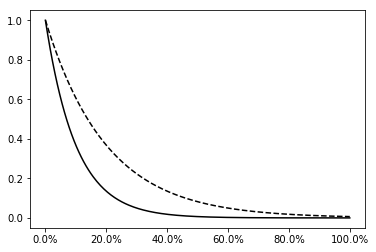

In [7]:
def make_label(value, pos):
 return '%0.1f%%' % (100. * value)
ax = plt.axes()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(make_label))
X = np.linspace(0, 1, 256)
plt.plot(X, np.exp(-10 * X), c ='k')
plt.plot(X, np.exp(-5 * X), c= 'k', ls = '--')
plt.show()

In [ ]:
### 05 在刻度上添加时间标签

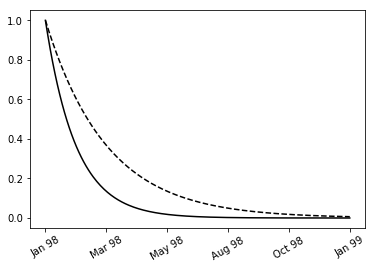

In [8]:
import datetime
start_date = datetime.datetime(1998, 1, 1)

def make_label(value, pos):
 time = start_date + datetime.timedelta(days = 365 * value)
 return time.strftime('%b %y')

ax = plt.axes()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(make_label))
X = np.linspace(0, 1, 256)
plt.plot(X, np.exp(-10 * X), c = 'k')
plt.plot(X, np.exp(-5 * X), c = 'k', ls = '--')
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 30.)
plt.show()